In [3]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

plt.rc('font', size=14)          # controls default text sizes
plt.rc('axes', titlesize=14)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14)    # fontsize of the tick labels
plt.rc('legend', fontsize=14)    # legend fontsize

# Task 1

Solve the Poisson equation on the grid:

$$ \frac{d^2}{dr^2}U(r) = - 4 \pi r n_s(r) $$
where $n_s(r) = |\phi(r)|^2$ is the density and $U(r) = r V_H(r)$. The equation can then be written as:

$$ \frac{d^2}{dr^2}U(r) = - 4 \pi rn_s(r) $$

Space is discretized as 

$$ r_i = 0+ih \hspace{10px} i=0,...,n, \hspace{10px} h = r_{max}/n $$
which leads to 
$$ U''(r_i) = \frac{U(r_{i+1})-2U(r_i) + U(r_{i-1})}{h^2}$$

Thus our equation becomes:

$$ U(r_{i+1})-2U(r_i) + U(r_{i-1})  = - 4 \pi h^2 |\phi(r_i)|^2 r_i $$

Writing this on matrix form with the vectors for U and the density times r, $\eta$:

\begin{equation}
    U = 
    \begin{bmatrix}
        U(r_0) \\
        U(r_1) \\
        U(r_2) \\
        ... \\
    \end{bmatrix}
\end{equation}

\begin{equation}
    \eta = 
    \begin{bmatrix}
        \eta(r_0) = - 4 \pi h^2 |\phi(r_0)|^2 r_0 \\
        \eta(r_1) \\
        \eta(r_2) \\
        ... \\
    \end{bmatrix}
\end{equation}

The $U$ vectors is of length $N+2$ and $\eta$ is of length $N$, with the two endterms encoding are boundary conditions: U(0)=0, U(inf)=1. phi can be evaluated as a function. The final matrix is thus Nx(N+2) for our N ordinary equations. The first few rows are:

\begin{equation}
    A' = 
    \begin{bmatrix}
        1 & -2 & 1 & 0 & 0 & 0 \\
        0 & 1 & -2 & 1 & 0 & 0 \\
        0 & 0 & 1 & -2 & 1 & 0 \\
        ... \\
    \end{bmatrix}
\end{equation}

Note that it is not (N+2)x(N+2) since the two equations centered around our endpoints doesn't exist. We rewrite this as an NxN matrix by moving in the i=0 and i=N+1 terms. We then get the NxN matrix A':

\begin{equation}
    A = 
    \begin{bmatrix}
        -2 & 1 & 0 & 0 & 0 \\
         1 & -2 & 1 & 0 & 0 \\
         0 & 1 & -2 & 1 & 0 \\
        ... \\
    \end{bmatrix}
\end{equation}

and 

\begin{equation}
    \eta = 
    \begin{bmatrix}
        \eta(r_0) = - 4 \pi h^2 |\phi(r_0)|^2 r_0 - 0\\
        \eta(r_1) \\
        \eta(r_2) \\
        ... \\
    \end{bmatrix}
\end{equation}

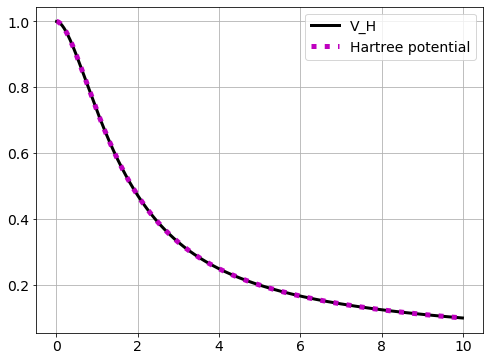

In [4]:
def phi_sq(r):
    '''Electron ground state function'''
    return 1/np.pi * np.exp(-2*r)

def Hart_pot(r):
    return 1/r - (1+1/r)*np.exp(-2*r)


N = 1000
r_inf = 10
h = r_inf/(N+2)
r = np.array([h*i for i in range(1,N+1)])
eta = -4*np.pi*r*h**2*phi_sq(r)
# Boundary conditions
eta[0] -= 0
eta[-1] -= 1

A = np.zeros((N,N))
for i in range(N):
    for j in range(N):
        if(i==j):
            A[i,j] = -2
        elif(np.abs(i-j) == 1):
            A[i,j] = 1
        else:
            A[i,j] = 0

# Solve this mf
U = np.linalg.solve(A, eta)

# Print solution
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(r, U/r, linewidth=3, c='k', label=r'V_H')
ax.plot(r, Hart_pot(r), c='m', linewidth=5, linestyle=':', alpha=1, label='Hartree potential')
ax.grid()
ax.legend(loc='best')

Implement the Schrödinger equation in a similar manner as the Poission equation above. We set V_H = 0. We discretize the derivates in f(r), which yields: 

$$ -\frac{1}{2} \frac{f(r_{i-1}) - 2f(r_{i}) + f(r_{i+1})}{h^2} - \frac{2}{r_i}f(r_i) + V_H(r_i)f(r_i) = \epsilon f(r_i) $$

$$ -\frac{1}{2} (f(r_{i-1}) - 2f(r_{i}) + f(r_{i+1})) = \epsilon f(r_i) + \frac{2}{r_i}f(r_i) - V_H(r_i)f(r_i) $$

$$ f(r_{i-1}) - 2f(r_{i}) + f(r_{i+1}) = -2 \left( \epsilon + \frac{2}{r_i} - V_H(r_i) \right)f(r_i)$$ 

Writing this on reduced matrix form as in task 1, we obtain the eigenvalue equation:

$$ Af = \lambda f$$

with 

\begin{equation}
    A = 
    \begin{bmatrix}
        -2 & 1 & 0 & 0 & 0 \\
         1 & -2 & 1 & 0 & 0 \\
         0 & 1 & -2 & 1 & 0 \\
        ... \\
    \end{bmatrix}
\end{equation}

and

\begin{equation}
    \lambda = 
    \begin{bmatrix}
        \lambda(r_0) = -2 \left( \epsilon + \frac{2}{r_0} - V_H(r_0) \right) - 0\\
        \lambda(r_1) \\
        \lambda(r_2) \\
        ... \\
        \lambda(r_{N+1}) = -2 \left( \epsilon + \frac{2}{r_{N+1}} - V_H(r_{N+1}) \right) - 0)
    \end{bmatrix}
\end{equation}